In [1]:
############################## SURVIVAL ANALYSIS ########################################################

####### ADD DRIVER GENES TO DATABASE WITH VARIABLES #################
import pandas as pd

# Load mutation data obtained with the specific filter applied after variant calling.
df_mutations = pd.read_excel('/home/vant/Escritorio/TFM CNIO/FINALS/New filtering after VC (David filters)/High_Filter_Davidaltreads40VAF0.1.xlsx')

# Remove specific samples with artefacts and mixed case (RVB3)
df_mutations = df_mutations[~df_mutations['Sample'].isin(['OVE44', 'OVE16','RVB3'])]

# Rename specific samples in df_mutations
df_mutations['Sample'] = df_mutations['Sample'].replace({
    'LP16_old': 'LP16', 
    'LP17_old': 'LP17', 
    'MDA51T1': 'MDA51_T1_CCC', 
    'MDA51T2': 'MDA51_T2_EC'
})

# Load file containing other variables
df_variables = pd.read_excel('Samples_alltypedata_annotated.xlsx')

# Remove the first two rows from df_variables
df_variables = df_variables.iloc[2:].reset_index(drop=True)
print(df_variables.head())
########Firstly we change misclassified samples to redo the analysis  #######################
# Change the values to 'MMRp' for samples 'LP20', 'LP26', and 'MDA15'
# We use .loc[] to access specific rows where 'ID_CNIO' matches one of the specified samples
df_variables.loc[df_variables['ID_CNIO'].isin(['LP20', 'LP26', 'MDA15']), 'MMR_final_status'] = 'MMRp'

# Change the values to 'MMRd' for sample 'MDA26' 
df_variables.loc[df_variables['ID_CNIO'].isin(['MDA26']), 'MMR_final_status'] = 'MMRd'

# Remove samples with artefacts in variant calling an mixed case (RVB3)
df_variables = df_variables[~df_variables['ID_CNIO'].isin(['OVE44', 'OVE16','RVB3'])]

# Modify 'Pol_mutation' value for the sample 'OVE64'. According to our new filters this sample is also mutated in POLD1 
df_variables.loc[df_variables['ID_CNIO'] == 'OVE64', 'Pol_mutation'] = 'POLD1'

# Clean values in df_mutations
df_mutations['Sample'] = df_mutations['Sample'].str.strip().str.upper()

# Merge DataFrames based on common columns. I keep only samples in both dataframes
df_combined = pd.merge(df_mutations, df_variables, left_on='Sample', right_on='ID_CNIO', how='inner')

# Modify 'Pol_mutation' value for the sample 'OVE64'. According to our new filters this sample is also mutated in POLD1 
df_combined.loc[df_combined['ID_CNIO'] == 'OVE64', 'Pol_mutation'] = 'POLD1'

# Print the length of the combined DataFrame
print("Length of df_combined is:", len(df_combined))

# Check the resulting merged DataFrame
print(df_combined.head())
print(df_combined.isnull().sum())  # Check for any missing values

# Create a dataframe with selected columns
mutations_variables_subset = df_combined[['Sample', 'Gene','Function', 'Abbreviation', 'Ref', 'Alt', 'HISTOLOGY','MMR_final_status','FIGOa']]

  ID_CNIO ID_ORIGINAL ID_ORIGINAL_NHC_BBANK HISTOLOGY HISTOLOGY_DETAIL AGE  \
0     LP1    02B28662                   NaN         0         No mixed  50   
1     LP2    08B18876                   NaN         0         No mixed  42   
2     LP3     08B260A                   NaN         0         No mixed  68   
3     LP4    11B18858                   NaN         0         No mixed  50   
4     LP5     99B6752                   NaN         0         No mixed  82   

  GRADE FIGO FIGOL FIGOa  ... Non-MMRd_mutation TILs_score_info  \
0     2    3     0     1  ...                NO             YES   
1     2    3     0     1  ...                NO             YES   
2     2    5     0     2  ...                NO             YES   
3     1    6     0     2  ...                NO             YES   
4     1    1     0     1  ...                NO             YES   

  TILs_CNIO_info TILs_ep_CNIO TILs_ep_LP TILs_ep_OTTA TILs_tu_CNIO TILs_tu_LP  \
0   YES_complete            1          9       

In [2]:
# Calculate the total number of samples in the entire cohort (including those without mutations)
total_samples = len(df_variables['ID_CNIO'].unique()) 
print("Total number of samples (including those without mutations):", total_samples)
# Calculate the total number of samples with mutations
total_samples_mut = len(df_mutations['Sample'].unique()) 
print("Total number of samples with mutations:", total_samples_mut)
print(df_variables.head())

Total number of samples (including those without mutations): 166
Total number of samples with mutations: 160
  ID_CNIO ID_ORIGINAL ID_ORIGINAL_NHC_BBANK HISTOLOGY HISTOLOGY_DETAIL AGE  \
0     LP1    02B28662                   NaN         0         No mixed  50   
1     LP2    08B18876                   NaN         0         No mixed  42   
2     LP3     08B260A                   NaN         0         No mixed  68   
3     LP4    11B18858                   NaN         0         No mixed  50   
4     LP5     99B6752                   NaN         0         No mixed  82   

  GRADE FIGO FIGOL FIGOa  ... Non-MMRd_mutation TILs_score_info  \
0     2    3     0     1  ...                NO             YES   
1     2    3     0     1  ...                NO             YES   
2     2    5     0     2  ...                NO             YES   
3     1    6     0     2  ...                NO             YES   
4     1    1     0     1  ...                NO             YES   

  TILs_CNIO_info TI

In [3]:
# List of all unique samples in df_mutations and df_variables_filtered
samples_in_mutations = df_mutations['Sample'].unique()
samples_in_variables = df_variables['ID_CNIO'].unique()

# List of samples in the combined dataframe (those that matched)
samples_in_combined = df_combined['Sample'].unique()

# Samples in df_mutations that are NOT in the combined DataFrame
missing_in_mutations = set(samples_in_mutations) - set(samples_in_combined)
print("Samples with mutations, but not data of variables:", missing_in_mutations)

# Samples in df_variables_filtered that are NOT in the combined DataFrame
missing_in_variables = set(samples_in_variables) - set(samples_in_combined)
print("Samples with variables data,but not mutations:", missing_in_variables)

Samples with mutations, but not data of variables: {'MDA20', 'LP81', 'MDA7', 'RVB7', 'LP54', '16T131', 'LP52'}
Samples with variables data,but not mutations: {'OVE92', 'LP11', 'MDA28', 'LP38', 'OVE34', 'OVE59', 'MDA17', 'LP97', 'LP76', 'LP73', 'MDA29', 'LP20', 'LP12'}


In [4]:
# Calculate the total number of samples with variables and mutations
total_samples_mut = len(mutations_variables_subset['Sample'].unique())
print("Total number of samples with variables and mutations:", total_samples_mut)

# Count the most frequent mutations per gene (one per sample). Keep unique combinations Sample-Gene
unique_mutations_per_sample = mutations_variables_subset.drop_duplicates(subset=['Sample', 'Gene'])
print(unique_mutations_per_sample.head())
# unique_mutations_per_sample.to_excel("Unique combinations sample-gene.xlsx",index=False)

# Calculate the number of samples that have mutations in each gene
mutations_per_gene = unique_mutations_per_sample['Gene'].value_counts()
print("Mutations per gene:\n", mutations_per_gene)

# Calculate the percentage of samples in which each gene is mutated (use total samples CC+EOC including those without mutations)
mutation_percentage = (mutations_per_gene / total_samples) * 100
print("Mutation percentage:\n",mutation_percentage)

Total number of samples with variables and mutations: 153
  Sample    Gene             Function Abbreviation Ref Alt HISTOLOGY  \
0    LP1  ARID1A             stopgain       Q1346X   C   T         0   
1    LP1  CTNNB1             missense         S33C   C   G         0   
2    LP1    PTEN             stopgain         Q17X   C   T         0   
3   LP13  ARID1A             stopgain       L2147X   T   A         0   
4   LP13  PIK3R1  frameshift_deletion   K513Nfs*19  TA   T         0   

  MMR_final_status FIGOa  
0             MMRp     1  
1             MMRp     1  
2             MMRp     1  
3             MMRp     4  
4             MMRp     4  
Mutations per gene:
 Gene
ARID1A    79
PIK3CA    70
CTNNB1    38
KRAS      35
PTEN      34
          ..
BMPR2      1
STK11      1
HRAS       1
FGFR1      1
ARID2      1
Name: count, Length: 88, dtype: int64
Mutation percentage:
 Gene
ARID1A    47.590361
PIK3CA    42.168675
CTNNB1    22.891566
KRAS      21.084337
PTEN      20.481928
            .

In [6]:
## Create a binary matrix in which the columns are the genes and the rows are the samples
# If a sample have a mutation in X gene it would be indicated with 1, if not with 0
# Create the binary matrix
mutation_matrix = pd.crosstab(unique_mutations_per_sample['Sample'], unique_mutations_per_sample['Gene'])

# Show the result
print(mutation_matrix.head())

Gene    ACVR2A  AKT1  ALK  APC  ARID1A  ARID1B  ARID2  ATM  ATR  ATRX  ...  \
Sample                                                                 ...   
LP1          0     0    0    0       1       0      0    0    0     0  ...   
LP13         0     0    0    0       1       0      0    0    0     0  ...   
LP14         0     0    0    0       0       0      0    0    0     0  ...   
LP15         0     0    0    0       0       0      0    0    0     0  ...   
LP16         1     0    0    0       1       0      0    0    0     0  ...   

Gene    STAT3  STK11  TEAD2  TGFBR2  TP53  TSC1  WASF3  WDTC1  XYLT2  ZBTB20  
Sample                                                                        
LP1         0      0      0       0     0     0      0      0      0       0  
LP13        0      0      0       0     0     0      0      0      0       0  
LP14        0      0      0       0     0     0      0      0      0       0  
LP15        0      0      0       0     0     0      0    

In [7]:
# Create an empty list to store mutated genes for each sample
drivers = []

# Iterate over each sample in df_variables
for sample in df_variables['ID_CNIO']:
    # Check if the sample exists in the mutation matrix
    if sample in mutation_matrix.index:
        # Select genes with mutations (those with a value of 1)
        mutated_genes = mutation_matrix.columns[mutation_matrix.loc[sample] == 1]
        # Convert mutated genes to a comma-separated string
        drivers.append(','.join(mutated_genes))
    else:
        # If no mutation, add an empty value
        drivers.append('')

# Create the 'Drivers' column in df_variables
df_variables['Drivers'] = drivers

# Display the result
print(df_variables.head())
df_variables.to_excel("/home/vant/TFM/Database + Drivers column.xlsx",index=False)

  ID_CNIO ID_ORIGINAL ID_ORIGINAL_NHC_BBANK HISTOLOGY HISTOLOGY_DETAIL AGE  \
0     LP1    02B28662                   NaN         0         No mixed  50   
1     LP2    08B18876                   NaN         0         No mixed  42   
2     LP3     08B260A                   NaN         0         No mixed  68   
3     LP4    11B18858                   NaN         0         No mixed  50   
4     LP5     99B6752                   NaN         0         No mixed  82   

  GRADE FIGO FIGOL FIGOa  ... TILs_score_info TILs_CNIO_info TILs_ep_CNIO  \
0     2    3     0     1  ...             YES   YES_complete            1   
1     2    3     0     1  ...             YES   YES_complete            2   
2     2    5     0     2  ...             YES   YES_complete            3   
3     1    6     0     2  ...             YES   YES_complete            2   
4     1    1     0     1  ...             YES             NO          NaN   

  TILs_ep_LP TILs_ep_OTTA TILs_tu_CNIO TILs_tu_LP TILs_raw_ep TILs_r

In [8]:
#### ADD COLUMNS TO DO SUBCLASSIFICATIONS ###############################

# Define helper function to check if a gene is mutated or not
def is_gene_mutated(drivers, gene):
    return gene in drivers.split(',')
# 'TP53mut': 1 if TP53 is mutated; otherwise 0
df_variables['TP53mut'] = df_variables['Drivers'].apply(
    lambda drivers: 1 if is_gene_mutated(drivers, 'TP53') else 0
)

# KMT2C_mut: 1 if KMT2C is mutated ; otherwise 0
df_variables['KMT2Cmut'] = df_variables['Drivers'].apply(
    lambda drivers: 1 if is_gene_mutated(drivers, 'KMT2C') else 0
)
# Display the result
print(df_variables.head(40))

   ID_CNIO                  ID_ORIGINAL ID_ORIGINAL_NHC_BBANK HISTOLOGY  \
0      LP1                     02B28662                   NaN         0   
1      LP2                     08B18876                   NaN         0   
2      LP3                      08B260A                   NaN         0   
3      LP4                     11B18858                   NaN         0   
4      LP5                      99B6752                   NaN         0   
5      LP8                     10B25690                   NaN         0   
6      LP9                     08B10682                   NaN         0   
7     LP11                     03B2020A                   NaN         0   
8     LP12                     08B27334                   NaN         0   
9     LP13                      09B7449                   NaN         0   
10    LP14                     12B14655                   NaN         0   
11    LP15                     00B18539                   NaN         0   
12    LP16               

In [10]:
##### SURVIVAL ANALYSIS ####################
# I install library to do survival analysis
!pip install lifelines

In [11]:
# Convert OS from days to months using a more accurate average of 30.44 days per month
df_variables['OS_MONTHS'] = df_variables['OS_CNIO'] / 30.44  # More accurate conversion
# Display the updated DataFrame to verify the conversion
print(df_variables[['OS_CNIO', 'OS_MONTHS']].head())

  OS_CNIO   OS_MONTHS
0    5568  182.917214
1    5163  169.612352
2    3047  100.098555
3    3497  114.881735
4    2534   83.245729


In [12]:
print(df_variables['KMT2Cmut'].unique())

[0 1]


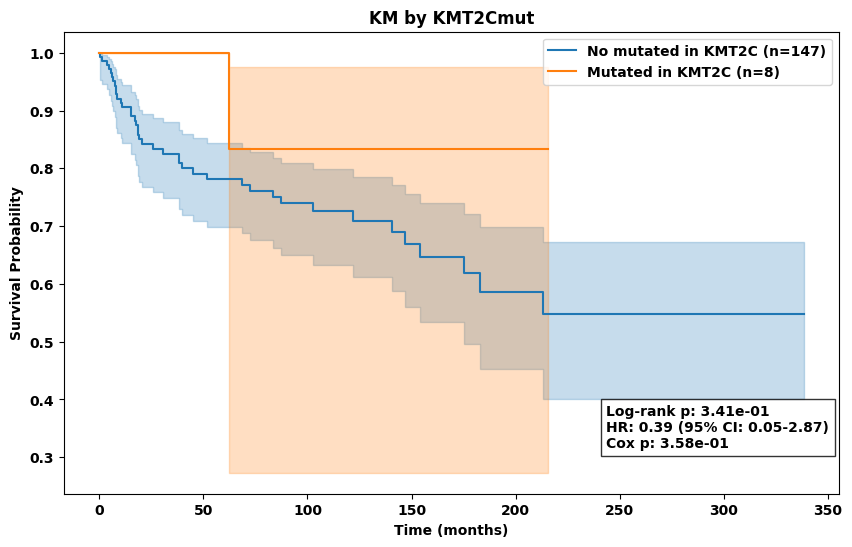

In [16]:
## SURVIVAL ANALYSIS BASED ON KMT2C MUTATION IN ALL COHORT ###############

# Import required libraries
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
# import pandas as pd
import matplotlib.pyplot as plt

# Convert OS_MONTHS, VITAL STATUS, and KMT2Cmut to numeric after making an explicit copy of the DataFrame
df_clean = df_variables.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'KMT2Cmut']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['KMT2Cmut'] = pd.to_numeric(df_clean['KMT2Cmut'], errors='coerce')

### 2 options: Using all OS values or limiting OS
#A)Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'KMT2Cmut']).copy()

#B) Apply the time limit filter
#df_clean = df_clean[(df_clean['OS_MONTHS'] <= 120)].dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'KMT2Cmut']).copy()

# Perform Cox proportional hazards model with KMT2Cmut
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', 'KMT2Cmut']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['KMT2Cmut']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split KMT2Cmut into two groups for Kaplan-Meier: KMT2Cmut=0 and KMT2Cmut=1
df_kmt2c_0 = df_clean[df_clean['KMT2Cmut'] == 0]
df_kmt2c_1 = df_clean[df_clean['KMT2Cmut'] == 1]

# Initialize Kaplan-Meier fitters
kmf_0 = KaplanMeierFitter()
kmf_1 = KaplanMeierFitter()

# Plot survival curves

# Plot survival curves
plt.figure(figsize=(10, 6))

# Fit and plot the survival curve for KMT2Cmut = 0 (No mutated)
kmf_0.fit(durations=df_kmt2c_0['OS_MONTHS'], 
          event_observed=df_kmt2c_0['VITAL STATUS'], 
          label=f"No mutated in KMT2C (n={len(df_kmt2c_0)})")
ax = kmf_0.plot_survival_function(ci_show=True)

# Fit and plot the survival curve for KMT2Cmut = 1 (Mutated)
kmf_1.fit(durations=df_kmt2c_1['OS_MONTHS'], 
          event_observed=df_kmt2c_1['VITAL STATUS'], 
          label=f"Mutated in KMT2C (n={len(df_kmt2c_1)})")
kmf_1.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_kmt2c_0['OS_MONTHS'], df_kmt2c_1['OS_MONTHS'],
                               event_observed_A=df_kmt2c_0['VITAL STATUS'],
                               event_observed_B=df_kmt2c_1['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("KM by KMT2Cmut",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')
# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_KMT2Cmut_with_Cox_ALL.png", dpi=300)
plt.show()

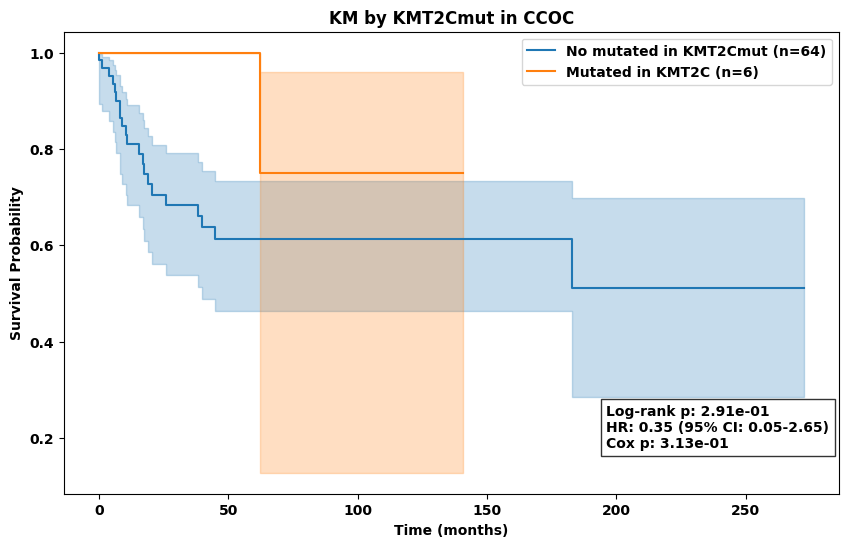

In [17]:
## SURVIVAL ANALYSIS BASED ON KMT2Cmut IN CCOC ###############

# Uncomment to import if not done previously
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter for samples with HISTOLOGY=1
df_filtered = df_variables[df_variables['HISTOLOGY'] == 1].copy()

# Convert OS_MONTHS, VITAL STATUS, and KMT2Cmut to numeric after making an explicit copy of the DataFrame
df_clean = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'KMT2Cmut']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['KMT2Cmut'] = pd.to_numeric(df_clean['KMT2Cmut'], errors='coerce')

### 2 options: Using all OS values or limiting OS
#A) Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'KMT2Cmut']).copy()

#B)Apply the time limit filter
#df_clean = df_clean[(df_clean['OS_MONTHS'] <= 120)].dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'KMT2Cmut']).copy()

# Perform Cox proportional hazards model with KMT2Cmut
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', 'KMT2Cmut']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['KMT2Cmut']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split KMT2Cmut into two groups for Kaplan-Meier: KMT2Cmut=0 and KMT2Cmut=1
df_kmt2c_0 = df_clean[df_clean['KMT2Cmut'] == 0]
df_kmt2c_1 = df_clean[df_clean['KMT2Cmut'] == 1]

# Initialize Kaplan-Meier fitters
kmf_0 = KaplanMeierFitter()
kmf_1 = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_0.fit(durations=df_kmt2c_0['OS_MONTHS'], 
          event_observed=df_kmt2c_0['VITAL STATUS'], 
          label=f"No mutated in KMT2Cmut (n={len(df_kmt2c_0)})")
ax = kmf_0.plot_survival_function(ci_show=True)

kmf_1.fit(durations=df_kmt2c_1['OS_MONTHS'], 
          event_observed=df_kmt2c_1['VITAL STATUS'], 
          label=f"Mutated in KMT2C (n={len(df_kmt2c_1)})")
kmf_1.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_kmt2c_0['OS_MONTHS'], df_kmt2c_1['OS_MONTHS'],
                               event_observed_A=df_kmt2c_0['VITAL STATUS'],
                               event_observed_B=df_kmt2c_1['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("KM by KMT2Cmut in CCOC",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')
# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_KMT2Cmut_CCOC_with_Cox.png", dpi=300)
plt.show()

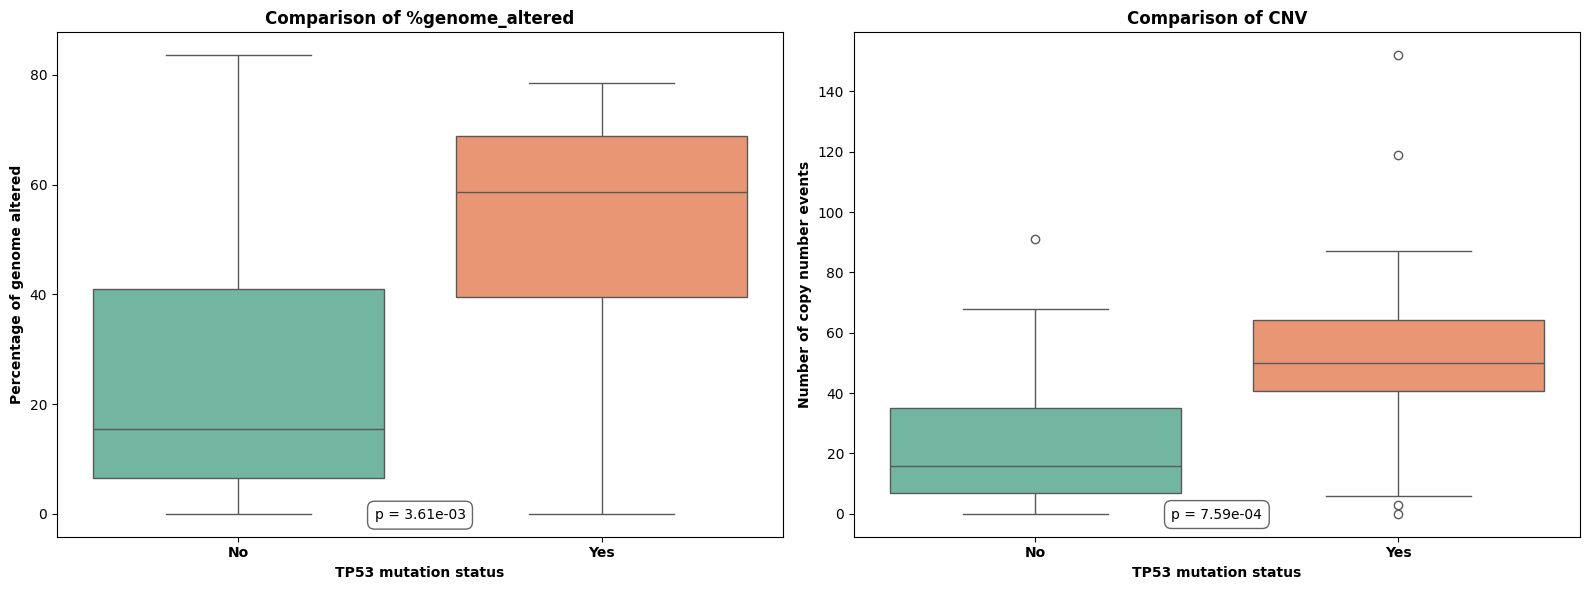

Comparison results:
Variable: %genome_altered
  Median (TP53mut=Yes): 58.72
  Median (TP53mut=No): 15.37
  N (TP53mut=Yes): 16
  N (TP53mut=No): 61
  Test Used: Mann-Whitney U test
  Statistic: 702.50
  p-value: 3.6070e-03

Variable: CNV
  Median (TP53mut=Yes): 50.00
  Median (TP53mut=No): 16.00
  N (TP53mut=Yes): 16
  N (TP53mut=No): 61
  Test Used: Mann-Whitney U test
  Statistic: 741.00
  p-value: 7.5853e-04



In [21]:
## Relation between CIN and TP53 mutations in CCOC ###########
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Filter the data for HISTOLOGY = 1 (i.e., only CCOC histology)
df_histology_1 = df_variables[df_variables['HISTOLOGY'] == 1].copy()

# Ensure that relevant columns are numeric (convert if necessary)
df_histology_1['%genome_altered'] = pd.to_numeric(df_histology_1['%genome_altered'], errors='coerce')
df_histology_1['CNV'] = pd.to_numeric(df_histology_1['CNV'], errors='coerce')

# Separate the data into two groups based on TP53 mutation status
group_tp53mut = df_histology_1[df_histology_1['TP53mut'] == 1]
group_tp53wt = df_histology_1[df_histology_1['TP53mut'] == 0]

# List of variables to compare
variables_to_compare = ['%genome_altered', 'CNV']

# Initialize a dictionary to store the results of statistical tests
results = {}

# Initialize subplots with 1 row and 2 columns (for two variables to compare)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Loop through the variables to compare and plot them in subplots
for i, variable in enumerate(variables_to_compare):
    # Drop NaN values for this variable in both mutation groups
    values_mut = group_tp53mut[variable].dropna()
    values_wt = group_tp53wt[variable].dropna()
    
    # Check if both groups have sufficient data (at least one non-NaN value)
    if len(values_mut) > 1 and len(values_wt) > 1:
        # Test for normality using Shapiro-Wilk test
        normal_mut = shapiro(values_mut)[1] > 0.05
        normal_wt = shapiro(values_wt)[1] > 0.05
        
        # Test for homogeneity of variances using Levene's test
        homogeneity = levene(values_mut, values_wt)[1] > 0.05
        
        # Decide which test to use
        if normal_mut and normal_wt and homogeneity:
            # Use independent t-test
            stat, p_value = ttest_ind(values_mut, values_wt, equal_var=True, alternative='greater')
            test_used = "t-test"
        else:
            # Use Mann-Whitney U test
            stat, p_value = mannwhitneyu(values_mut, values_wt, alternative='greater')
            test_used = "Mann-Whitney U test"
        
        # Store the results: medians, test statistic, p-value, and test used
        results[variable] = {'Median_TP53mut': values_mut.median(),
                             'Median_TP53wt': values_wt.median(),
                             'N_tp53mut': values_mut.count(),
                             'N_tp53wt': values_wt.count(),
                             'Test Used': test_used,
                             'Stat': stat,
                             'p-value': p_value}
        
        # Plot the boxplot in the corresponding subplot
        sns.boxplot(data=df_histology_1, x='TP53mut', y=variable, 
                    ax=axes[i], hue='TP53mut', palette='Set2', dodge=False, legend=False)
        
        # Customize the plot's appearance
        axes[i].set_title(f'Comparison of {variable}', fontweight='bold')  # Title
        axes[i].set_xlabel('TP53 mutation status', fontweight='bold')  # X-axis label
        axes[i].set_ylabel('Percentage of genome altered' if variable == '%genome_altered' else 'Number of copy number events', fontweight='bold')  # Y-axis label
        axes[i].set_xticks([0, 1])  # Set X-axis ticks at positions 0 and 1
        axes[i].set_xticklabels(['No', 'Yes'], fontweight='bold')  # Set X-axis labels to 'No' and 'Yes'
        
        # Annotate the p-value and test used below the plot
        axes[i].text(0.5, -0.25, f"p = {p_value:.2e}", ha='center', va='center', fontsize=10, 
                     bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.5'))
    else:
        # Print a message if one of the groups does not have sufficient data for the variable
        print(f"Insufficient data for variable: {variable}")

# Adjust layout to ensure proper spacing between subplots
plt.tight_layout()

# Save the figure as a PNG file with high resolution and show the plot
plt.savefig('/home/vant/TFM/Plots_TFM_final/CIN_TP53mut_CCOC.png', dpi=300)
plt.show()

# Print the results of the statistical tests for each variable
print("Comparison results:")
for var, res in results.items():
    print(f"Variable: {var}")
    print(f"  Median (TP53mut=Yes): {res['Median_TP53mut']:.2f}")
    print(f"  Median (TP53mut=No): {res['Median_TP53wt']:.2f}")
    print(f"  N (TP53mut=Yes): {res['N_tp53mut']}")
    print(f"  N (TP53mut=No): {res['N_tp53wt']}")
    print(f"  Test Used: {res['Test Used']}")
    print(f"  Statistic: {res['Stat']:.2f}")
    print(f"  p-value: {res['p-value']:.4e}")
    print()  # Empty line between results


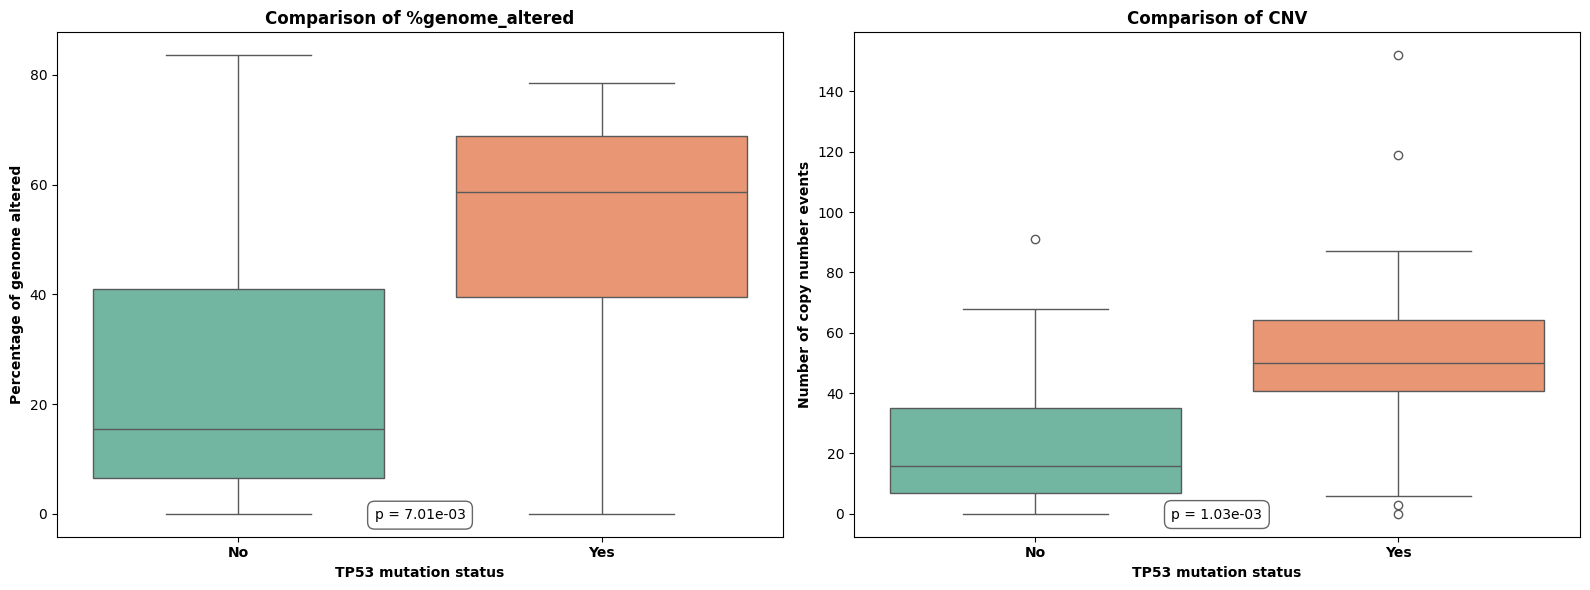

Comparison results:
Variable: %genome_altered
  Median (TP53mut=Yes): 28.97
  Median (TP53mut=No): 5.43
  N (TP53mut=Yes): 11
  N (TP53mut=No): 78
  Test Used: Mann-Whitney U test
  Statistic: 626.50
  p-value: 7.0095e-03

Variable: CNV
  Median (TP53mut=Yes): 29.00
  Median (TP53mut=No): 6.00
  N (TP53mut=Yes): 11
  N (TP53mut=No): 78
  Test Used: Mann-Whitney U test
  Statistic: 676.00
  p-value: 1.0303e-03



In [23]:
## Relation between CIN and TP53 mutations in EOC ###########

# Uncomment to import if not done previously
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Filter the data for HISTOLOGY = 0 (i.e., only EOC histology)
df_histology_0 = df_variables[df_variables['HISTOLOGY'] == 0].copy()

# Ensure that relevant columns are numeric (convert if necessary)
df_histology_0['%genome_altered'] = pd.to_numeric(df_histology_0['%genome_altered'], errors='coerce')
df_histology_0['CNV'] = pd.to_numeric(df_histology_0['CNV'], errors='coerce')

# Separate the data into two groups based on TP53 mutation status
group_tp53mut = df_histology_0[df_histology_0['TP53mut'] == 1]
group_tp53wt = df_histology_0[df_histology_0['TP53mut'] == 0]

# List of variables to compare
variables_to_compare = ['%genome_altered', 'CNV']

# Initialize a dictionary to store the results of statistical tests
results = {}

# Initialize subplots with 1 row and 2 columns (for two variables to compare)
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

# Loop through the variables to compare and plot them in subplots
for i, variable in enumerate(variables_to_compare):
    # Drop NaN values for this variable in both mutation groups
    values_mut = group_tp53mut[variable].dropna()
    values_wt = group_tp53wt[variable].dropna()
    
    # Check if both groups have sufficient data (at least one non-NaN value)
    if len(values_mut) > 1 and len(values_wt) > 1:
        # Test for normality using Shapiro-Wilk test
        normal_mut = shapiro(values_mut)[1] > 0.05
        normal_wt = shapiro(values_wt)[1] > 0.05
        
        # Test for homogeneity of variances using Levene's test
        homogeneity = levene(values_mut, values_wt)[1] > 0.05
        
        # Decide which test to use
        if normal_mut and normal_wt and homogeneity:
            # Use independent t-test
            stat, p_value = ttest_ind(values_mut, values_wt, equal_var=True, alternative='greater')
            test_used = "t-test"
        else:
            # Use Mann-Whitney U test
            stat, p_value = mannwhitneyu(values_mut, values_wt, alternative='greater')
            test_used = "Mann-Whitney U test"
        
        # Store the results: medians, test statistic, p-value, and test used
        results[variable] = {'Median_TP53mut': values_mut.median(),
                             'Median_TP53wt': values_wt.median(),
                             'N_tp53mut': values_mut.count(),
                             'N_tp53wt': values_wt.count(),
                             'Test Used': test_used,
                             'Stat': stat,
                             'p-value': p_value}
        
        # Plot the boxplot in the corresponding subplot
        sns.boxplot(data=df_histology_1, x='TP53mut', y=variable, 
                    ax=axes[i], hue='TP53mut', palette='Set2', dodge=False, legend=False)
        
        # Customize the plot's appearance
        axes[i].set_title(f'Comparison of {variable}', fontweight='bold')  # Title
        axes[i].set_xlabel('TP53 mutation status', fontweight='bold')  # X-axis label
        axes[i].set_ylabel('Percentage of genome altered' if variable == '%genome_altered' else 'Number of copy number events', fontweight='bold')  # Y-axis label
        axes[i].set_xticks([0, 1])  # Set X-axis ticks at positions 0 and 1
        axes[i].set_xticklabels(['No', 'Yes'], fontweight='bold')  # Set X-axis labels to 'No' and 'Yes'
        
        # Annotate the p-value and test used below the plot
        axes[i].text(0.5, -0.25, f"p = {p_value:.2e}", ha='center', va='center', fontsize=10, 
                     bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.5'))
    else:
        # Print a message if one of the groups does not have sufficient data for the variable
        print(f"Insufficient data for variable: {variable}")

# Adjust layout to ensure proper spacing between subplots
plt.tight_layout()

# Save the figure as a PNG file with high resolution and show the plot
plt.savefig('/home/vant/TFM/Plots_TFM_final/CIN_TP53mut_EOC.png', dpi=300)
plt.show()

# Print the results of the statistical tests for each variable
print("Comparison results:")
for var, res in results.items():
    print(f"Variable: {var}")
    print(f"  Median (TP53mut=Yes): {res['Median_TP53mut']:.2f}")
    print(f"  Median (TP53mut=No): {res['Median_TP53wt']:.2f}")
    print(f"  N (TP53mut=Yes): {res['N_tp53mut']}")
    print(f"  N (TP53mut=No): {res['N_tp53wt']}")
    print(f"  Test Used: {res['Test Used']}")
    print(f"  Statistic: {res['Stat']:.2f}")
    print(f"  p-value: {res['p-value']:.4e}")
    print()  # Empty line between results


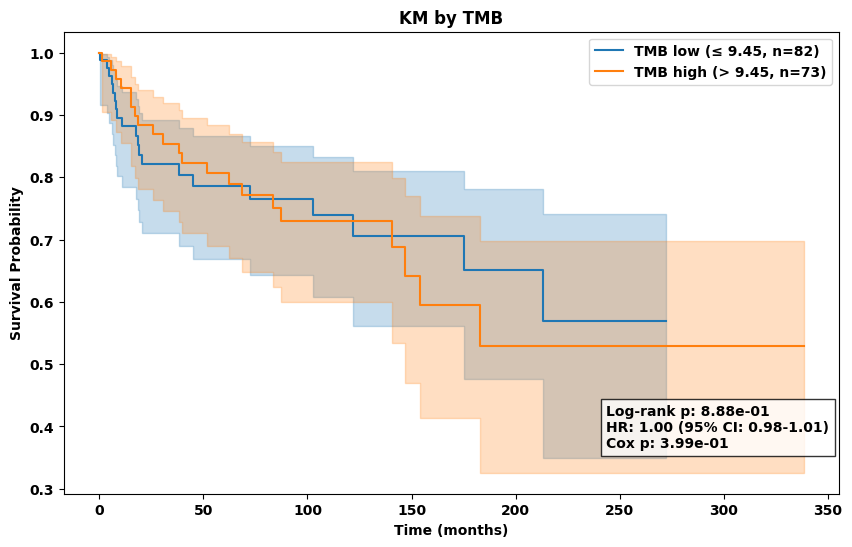

In [28]:
### SURVIVAL ANALYSIS BASED ON TMB VALUES AFTER CATEGORIZING IN LOW AND HIGH VALUES CATEGORIES ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Convert OS_MONTHS, VITAL STATUS, and TMB to numeric after making an explicit copy of the DataFrame
df_clean = df_variables.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'TMB']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['TMB'] = pd.to_numeric(df_clean['TMB'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'TMB']).copy()

# Perform Cox proportional hazards model with TMB
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', 'TMB']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['TMB']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split TMB into two groups for Kaplan-Meier: TMB-low and TMB-high based on median TMB value
median_tmb = round(df_clean['TMB'].median(), 2)  # Round
df_tmb_low = df_clean[df_clean['TMB'] <= median_tmb]
df_tmb_high = df_clean[df_clean['TMB'] > median_tmb]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_tmb_low['OS_MONTHS'], 
            event_observed=df_tmb_low['VITAL STATUS'], 
            label=f"TMB low (≤ {median_tmb:.2f}, n={len(df_tmb_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_tmb_high['OS_MONTHS'], 
             event_observed=df_tmb_high['VITAL STATUS'], 
             label=f"TMB high (> {median_tmb:.2f}, n={len(df_tmb_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_tmb_low['OS_MONTHS'], df_tmb_high['OS_MONTHS'],
                               event_observed_A=df_tmb_low['VITAL STATUS'],
                               event_observed_B=df_tmb_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("KM by TMB",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')

# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_TMB_ALL_with_Cox.png", dpi=300)
plt.show()

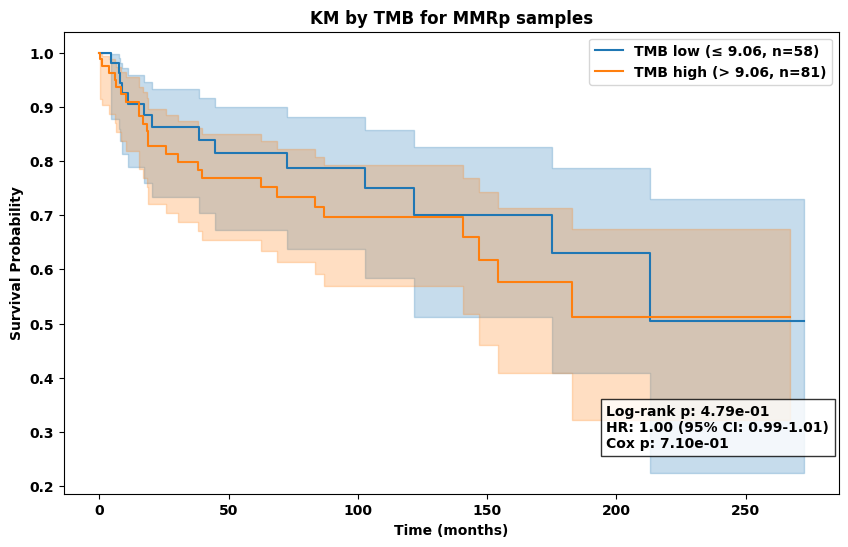

In [27]:
### SURVIVAL ANALYSIS BASED ON TMB WITH MMRp FILTER ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter the data for MMRp status
df_filtered = df_variables[df_variables['MMR_final_status'] == 'MMRp'].copy()

# Convert OS_MONTHS, VITAL STATUS, and TMB to numeric after making an explicit copy of the DataFrame
df_clean = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'TMB']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['TMB'] = pd.to_numeric(df_clean['TMB'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'TMB']).copy()

# Perform Cox proportional hazards model with TMB
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', 'TMB']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['TMB']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split TMB into two groups for Kaplan-Meier: TMB-low and TMB-high based on median TMB value
median_tmb = round(df_clean['TMB'].median(), 2)
df_tmb_low = df_clean[df_clean['TMB'] <= median_tmb]
df_tmb_high = df_clean[df_clean['TMB'] > median_tmb]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_tmb_low['OS_MONTHS'], 
            event_observed=df_tmb_low['VITAL STATUS'], 
            label=f"TMB low (≤ {median_tmb:.2f}, n={len(df_tmb_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_tmb_high['OS_MONTHS'], 
             event_observed=df_tmb_high['VITAL STATUS'], 
             label=f"TMB high (> {median_tmb:.2f}, n={len(df_tmb_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_tmb_low['OS_MONTHS'], df_tmb_high['OS_MONTHS'],
                               event_observed_A=df_tmb_low['VITAL STATUS'],
                               event_observed_B=df_tmb_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("KM by TMB for MMRp samples",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')
# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_TMB_MMRp_with_Cox.png", dpi=300)
plt.show()

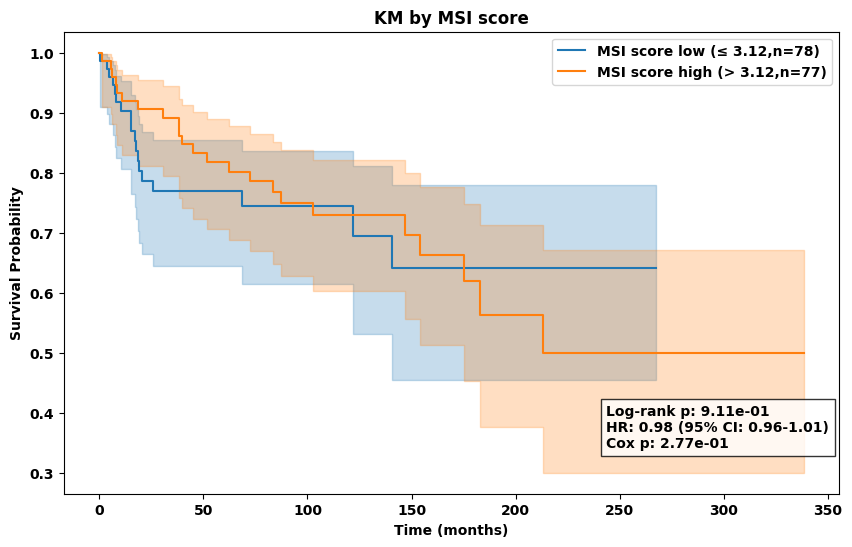

In [29]:
### SURVIVAL ANALYSIS BASED ON MSI-sensor2 ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Convert OS_MONTHS, VITAL STATUS, and MSI-sensor2 to numeric after making an explicit copy of the DataFrame
df_clean = df_variables.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'MSI_sensor2']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['MSI-sensor2'] = pd.to_numeric(df_clean['MSI_sensor2'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'MSI_sensor2']).copy()

# Perform Cox proportional hazards model with MSI-sensor2
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', 'MSI_sensor2']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['MSI_sensor2']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split MSI-sensor2 into two groups for Kaplan-Meier: MSI-low and MSI-high based on median MSI-sensor2 value
median_msi = round(df_clean['MSI_sensor2'].median(),2)
df_msi_low = df_clean[df_clean['MSI_sensor2'] <= median_msi]
df_msi_high = df_clean[df_clean['MSI_sensor2'] > median_msi]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_msi_low['OS_MONTHS'], 
            event_observed=df_msi_low['VITAL STATUS'], 
            label=f"MSI score low (≤ {median_msi:.2f},n={len(df_msi_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_msi_high['OS_MONTHS'], 
             event_observed=df_msi_high['VITAL STATUS'], 
             label=f"MSI score high (> {median_msi:.2f},n={len(df_msi_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_msi_low['OS_MONTHS'], df_msi_high['OS_MONTHS'],
                               event_observed_A=df_msi_low['VITAL STATUS'],
                               event_observed_B=df_msi_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("KM by MSI score",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')
# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_MSI-score_ALL_with_Cox.png", dpi=300)
plt.show()

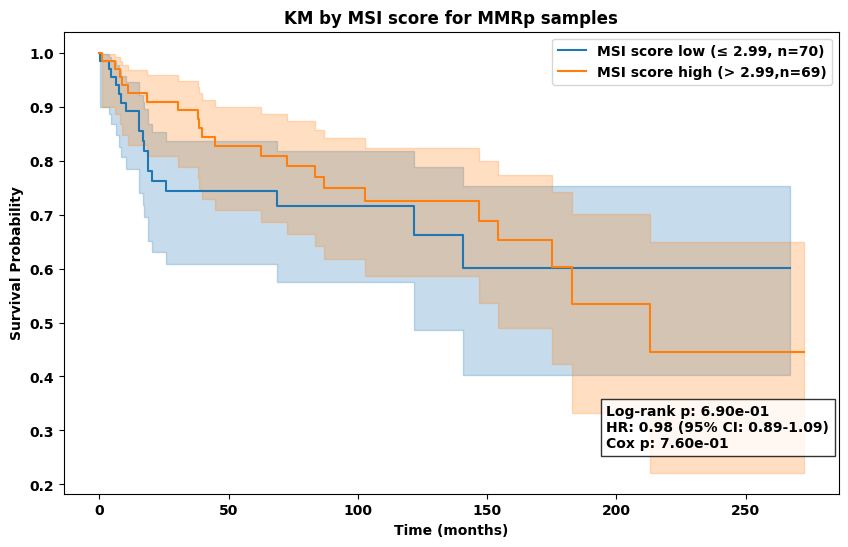

In [30]:
### SURVIVAL ANALYSIS BASED ON MSI_sensor2 WITH MMRp FILTER ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter the data for MMRp status
df_filtered = df_variables[df_variables['MMR_final_status'] == 'MMRp'].copy()

# Convert OS_MONTHS, VITAL STATUS, and MSI_sensor2 to numeric after making an explicit copy of the DataFrame
df_clean = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'MSI_sensor2']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['MSI_sensor2'] = pd.to_numeric(df_clean['MSI_sensor2'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'MSI_sensor2']).copy()

# Perform Cox proportional hazards model with MSI_sensor2
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', 'MSI_sensor2']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['MSI_sensor2']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split MSI_sensor2 into two groups for Kaplan-Meier: MSI_low and MSI_high based on median MSI_sensor2 value
median_msi =round(df_clean['MSI_sensor2'].median(),2)
df_msi_low = df_clean[df_clean['MSI_sensor2'] <= median_msi]
df_msi_high = df_clean[df_clean['MSI_sensor2'] > median_msi]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_msi_low['OS_MONTHS'], 
            event_observed=df_msi_low['VITAL STATUS'], 
            label=f"MSI score low (≤ {median_msi:.2f}, n={len(df_msi_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_msi_high['OS_MONTHS'], 
             event_observed=df_msi_high['VITAL STATUS'], 
             label=f"MSI score high (> {median_msi:.2f},n={len(df_msi_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_msi_low['OS_MONTHS'], df_msi_high['OS_MONTHS'],
                               event_observed_A=df_msi_low['VITAL STATUS'],
                               event_observed_B=df_msi_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("KM by MSI score for MMRp samples",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')
# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_MSI_sensor2_MMRp_with_Cox.png", dpi=300)
plt.show()


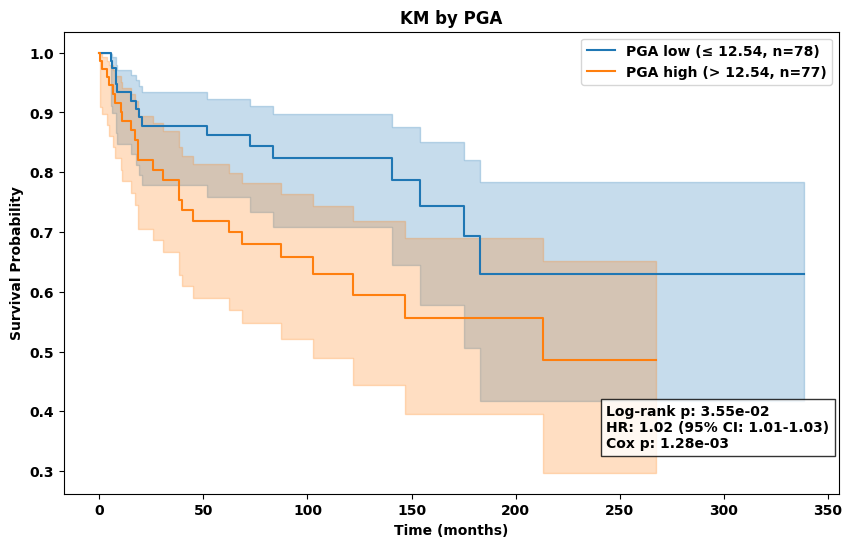

In [31]:
## SURVIVAL ANALYSIS BASED ON %GENOME_ALTERED ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Convert OS_MONTHS, VITAL STATUS, and %GENOME_ALTERED to numeric after making an explicit copy of the DataFrame
df_clean = df_variables.dropna(subset=['VITAL STATUS', 'OS_MONTHS', '%genome_altered']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['%genome_altered'] = pd.to_numeric(df_clean['%genome_altered'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', '%genome_altered']).copy()

# Perform Cox proportional hazards model with %GENOME_ALTERED
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', '%genome_altered']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['%genome_altered']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split %GENOME_ALTERED into two groups for Kaplan-Meier: genome-altered-low and genome-altered-high based on median value
median_genome_altered = round(df_clean['%genome_altered'].median(),2)
df_genome_altered_low = df_clean[df_clean['%genome_altered'] <= median_genome_altered]
df_genome_altered_high = df_clean[df_clean['%genome_altered'] > median_genome_altered]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_genome_altered_low['OS_MONTHS'], 
            event_observed=df_genome_altered_low['VITAL STATUS'], 
            label=f"PGA low (≤ {median_genome_altered:.2f}, n={len(df_genome_altered_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_genome_altered_high['OS_MONTHS'], 
             event_observed=df_genome_altered_high['VITAL STATUS'], 
             label=f"PGA high (> {median_genome_altered:.2f}, n={len(df_genome_altered_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_genome_altered_low['OS_MONTHS'], df_genome_altered_high['OS_MONTHS'],
                               event_observed_A=df_genome_altered_low['VITAL STATUS'],
                               event_observed_B=df_genome_altered_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("KM by PGA",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')

# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_PGA_ALL_with_Cox.png", dpi=300)
plt.show()

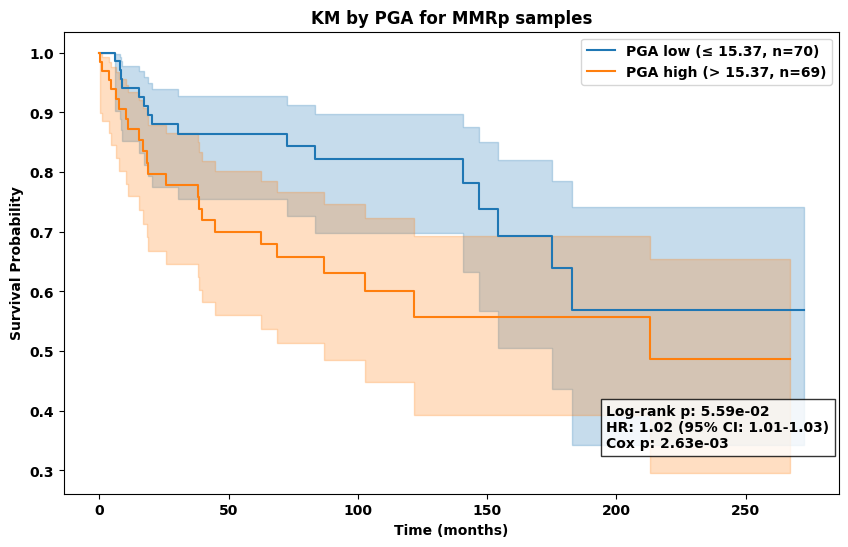

In [33]:
### SURVIVAL ANALYSIS BASED ON %genome_altered WITH MMRp FILTER ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter the data for MMRp status
df_filtered = df_variables[df_variables['MMR_final_status'] == 'MMRp'].copy()

# Convert OS_MONTHS, VITAL STATUS, and %genome_altered to numeric after making an explicit copy of the DataFrame
df_clean = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', '%genome_altered']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['%genome_altered'] = pd.to_numeric(df_clean['%genome_altered'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', '%genome_altered']).copy()

# Perform Cox proportional hazards model with %genome_altered
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', '%genome_altered']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['%genome_altered']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split %genome_altered into two groups for Kaplan-Meier: low and high based on median %genome_altered value
median_genome_altered = round(df_clean['%genome_altered'].median(),2)
df_genome_altered_low = df_clean[df_clean['%genome_altered'] <= median_genome_altered]
df_genome_altered_high = df_clean[df_clean['%genome_altered'] > median_genome_altered]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_genome_altered_low['OS_MONTHS'], 
            event_observed=df_genome_altered_low['VITAL STATUS'], 
            label=f"PGA low (≤ {median_genome_altered:.2f}, n={len(df_genome_altered_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_genome_altered_high['OS_MONTHS'], 
             event_observed=df_genome_altered_high['VITAL STATUS'], 
             label=f"PGA high (> {median_genome_altered:.2f}, n={len(df_genome_altered_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_genome_altered_low['OS_MONTHS'], df_genome_altered_high['OS_MONTHS'],
                               event_observed_A=df_genome_altered_low['VITAL STATUS'],
                               event_observed_B=df_genome_altered_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("KM by PGA for MMRp samples",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')

# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_PGA_MMRp_with_Cox.png", dpi=300)
plt.show()

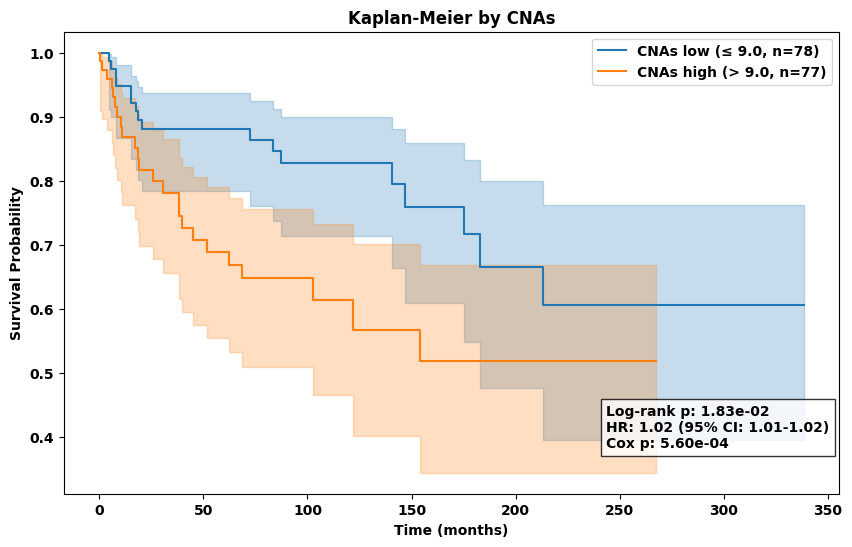

In [35]:
## SURVIVAL ANALYSIS BASED ON CNAs ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Convert OS_MONTHS, VITAL STATUS, and CNV to numeric after making an explicit copy of the DataFrame
df_clean = df_variables.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'CNV']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['CNV'] = pd.to_numeric(df_clean['CNV'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'CNV']).copy()

# Perform Cox proportional hazards model with CNV
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', 'CNV']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['CNV']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split CNV into two groups for Kaplan-Meier: CNV-low and CNV-high based on median CNV value
median_cnv = round(df_clean['CNV'].median(),2)
df_cnv_low = df_clean[df_clean['CNV'] <= median_cnv]
df_cnv_high = df_clean[df_clean['CNV'] > median_cnv]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_cnv_low['OS_MONTHS'], 
            event_observed=df_cnv_low['VITAL STATUS'], 
            label=f"CNAs low (≤ {median_cnv}, n={len(df_cnv_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_cnv_high['OS_MONTHS'], 
             event_observed=df_cnv_high['VITAL STATUS'], 
             label=f"CNAs high (> {median_cnv}, n={len(df_cnv_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_cnv_low['OS_MONTHS'], df_cnv_high['OS_MONTHS'],
                               event_observed_A=df_cnv_low['VITAL STATUS'],
                               event_observed_B=df_cnv_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("Kaplan-Meier by CNAs",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')

# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_CNAs_ALL_with_Cox.png", dpi=300)
plt.show()

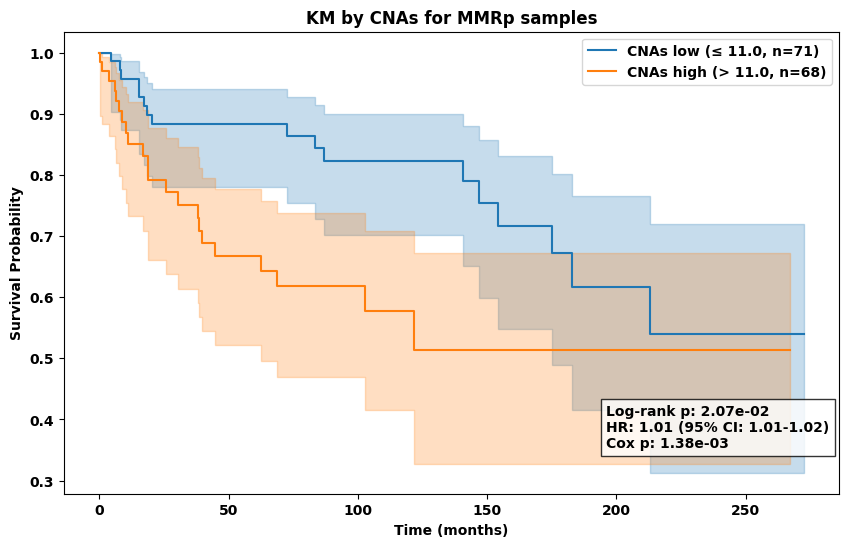

In [36]:
### SURVIVAL ANALYSIS BASED ON CNAs WITH MMRp FILTER ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter the data for MMRp status
df_filtered = df_variables[df_variables['MMR_final_status'] == 'MMRp'].copy()

# Convert OS_MONTHS, VITAL STATUS, and CNV to numeric after making an explicit copy of the DataFrame
df_clean = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'CNV']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['CNV'] = pd.to_numeric(df_clean['CNV'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'CNV']).copy()

# Perform Cox proportional hazards model with CNV
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', 'CNV']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['CNV']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split CNV into two groups for Kaplan-Meier: low and high based on median CNV value
median_cnv = df_clean['CNV'].median()
df_cnv_low = df_clean[df_clean['CNV'] <= median_cnv]
df_cnv_high = df_clean[df_clean['CNV'] > median_cnv]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_cnv_low['OS_MONTHS'], 
            event_observed=df_cnv_low['VITAL STATUS'], 
            label=f"CNAs low (≤ {median_cnv}, n={len(df_cnv_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_cnv_high['OS_MONTHS'], 
             event_observed=df_cnv_high['VITAL STATUS'], 
             label=f"CNAs high (> {median_cnv}, n={len(df_cnv_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_cnv_low['OS_MONTHS'], df_cnv_high['OS_MONTHS'],
                               event_observed_A=df_cnv_low['VITAL STATUS'],
                               event_observed_B=df_cnv_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("KM by CNAs for MMRp samples",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')
# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_CNAs_MMRp_with_Cox.png", dpi=300)
plt.show()

In [46]:
#### SURVIVAL ANALYSIS BY HISTOLOGY IN ALL SAMPLES OR ONLY MMRp SAMPLES ##########################

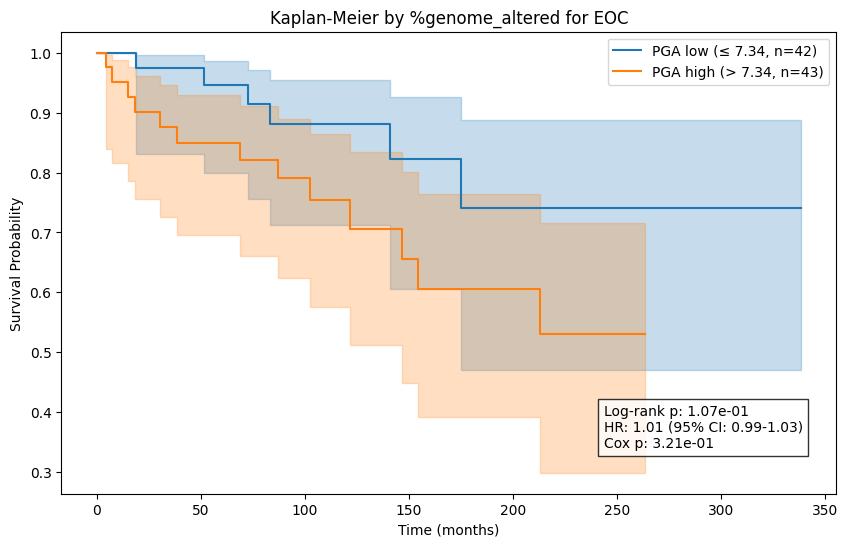

In [49]:
## SURVIVAL ANALYSIS BASED ON %genome_altered WITH HISTOLOGY FILTER ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter data to include only samples with HISTOLOGY = 0.Change to 'HISTOLOGY'=1 for CCOC
df_filtered = df_variables[df_variables['HISTOLOGY'] == 0].copy()

# Convert OS_MONTHS, VITAL STATUS, and %genome_altered to numeric after making an explicit copy of the DataFrame
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', '%genome_altered']).copy()
df_filtered['OS_MONTHS'] = pd.to_numeric(df_filtered['OS_MONTHS'], errors='coerce')
df_filtered['VITAL STATUS'] = pd.to_numeric(df_filtered['VITAL STATUS'], errors='coerce')
df_filtered['%genome_altered'] = pd.to_numeric(df_filtered['%genome_altered'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', '%genome_altered']).copy()

# Perform Cox proportional hazards model with %genome_altered
cox_data = df_filtered[['OS_MONTHS', 'VITAL STATUS', '%genome_altered']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['%genome_altered']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split %genome_altered into two groups for Kaplan-Meier: genome-altered-low and genome-altered-high based on median %genome_altered value
median_genome_altered = round(df_filtered['%genome_altered'].median(),2)
df_genome_altered_low = df_filtered[df_filtered['%genome_altered'] <= median_genome_altered]
df_genome_altered_high = df_filtered[df_filtered['%genome_altered'] > median_genome_altered]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_genome_altered_low['OS_MONTHS'], 
            event_observed=df_genome_altered_low['VITAL STATUS'], 
            label=f"PGA low (≤ {median_genome_altered:.2f}, n={len(df_genome_altered_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_genome_altered_high['OS_MONTHS'], 
             event_observed=df_genome_altered_high['VITAL STATUS'], 
             label=f"PGA high (> {median_genome_altered:.2f}, n={len(df_genome_altered_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_genome_altered_low['OS_MONTHS'], df_genome_altered_high['OS_MONTHS'],
                               event_observed_A=df_genome_altered_low['VITAL STATUS'],
                               event_observed_B=df_genome_altered_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("Kaplan-Meier by %genome_altered for EOC") # Change for CCOC when analysing CCOC samples
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

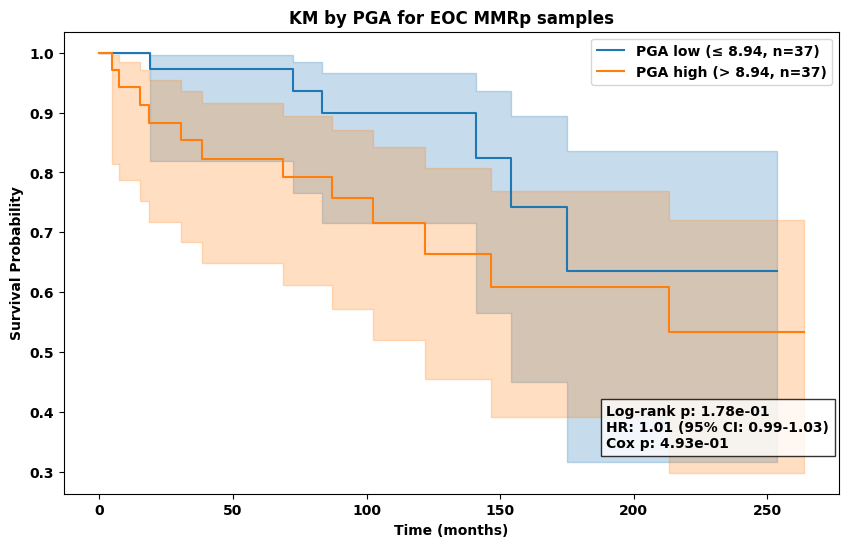

In [50]:
### SURVIVAL ANALYSIS BASED ON %GENOME_ALTERED BY HISTOLOGY IN MMRp SAMPLES ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter the data for HISTOLOGY = 0 and MMRp status.Change to 'HISTOLOGY'=1 for CCOC
df_filtered = df_variables[(df_variables['HISTOLOGY'] == 0) & (df_variables['MMR_final_status'] == 'MMRp')].copy()

# Convert OS_MONTHS, VITAL STATUS, and %GENOME_ALTERED to numeric after making an explicit copy of the DataFrame
df_clean = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', '%genome_altered']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['%genome_altered'] = pd.to_numeric(df_clean['%genome_altered'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', '%genome_altered']).copy()

# Perform Cox proportional hazards model with %GENOME_ALTERED
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', '%genome_altered']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['%genome_altered']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split %GENOME_ALTERED into two groups for Kaplan-Meier: low and high based on median value
median_genome_altered = round(df_clean['%genome_altered'].median(),2)
df_genome_altered_low = df_clean[df_clean['%genome_altered'] <= median_genome_altered]
df_genome_altered_high = df_clean[df_clean['%genome_altered'] > median_genome_altered]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_genome_altered_low['OS_MONTHS'], 
            event_observed=df_genome_altered_low['VITAL STATUS'], 
            label=f"PGA low (≤ {median_genome_altered:.2f}, n={len(df_genome_altered_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_genome_altered_high['OS_MONTHS'], 
             event_observed=df_genome_altered_high['VITAL STATUS'], 
             label=f"PGA high (> {median_genome_altered:.2f}, n={len(df_genome_altered_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_genome_altered_low['OS_MONTHS'], df_genome_altered_high['OS_MONTHS'],
                               event_observed_A=df_genome_altered_low['VITAL STATUS'],
                               event_observed_B=df_genome_altered_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",fontweight='bold',
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("KM by PGA for EOC MMRp samples",fontweight='bold')
plt.xlabel("Time (months)",fontweight='bold')
plt.ylabel("Survival Probability",fontweight='bold')
# Set axis tick labels to bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Update legend with bold text
plt.legend(fontsize=10, title_fontsize=10, prop={'weight': 'bold'})

# Save the figure and show
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_PGA_EOC_MMRp_with_Cox.png", dpi=300)
plt.show()

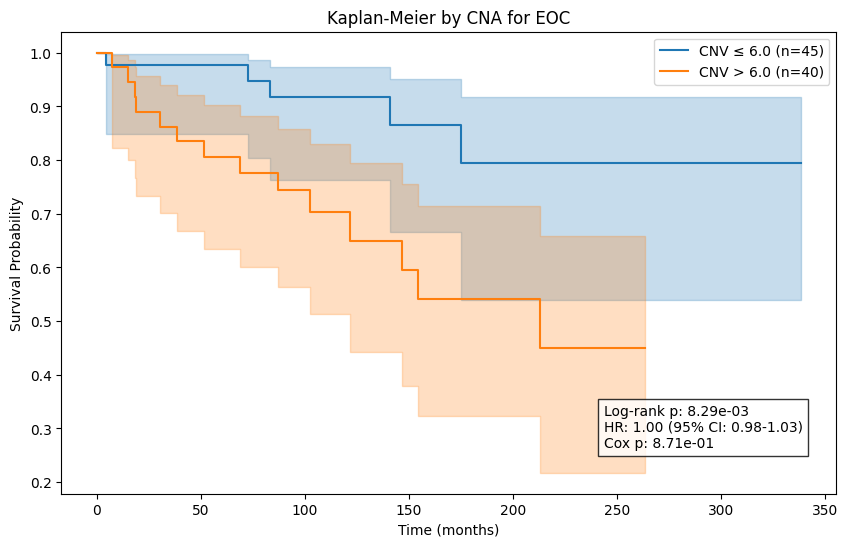

In [51]:
## SURVIVAL ANALYSIS BASED ON CNAs WITH HISTOLOGY FILTER ###############

# Import required libraries
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
import pandas as pd
import matplotlib.pyplot as plt

# Filter data to include only samples with HISTOLOGY = 0.Change to 'HISTOLOGY'=1 for CCOC
df_filtered = df_variables[df_variables['HISTOLOGY'] == 0].copy()

# Convert OS_MONTHS, VITAL STATUS, and CNV to numeric after making an explicit copy of the DataFrame
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'CNV']).copy()
df_filtered['OS_MONTHS'] = pd.to_numeric(df_filtered['OS_MONTHS'], errors='coerce')
df_filtered['VITAL STATUS'] = pd.to_numeric(df_filtered['VITAL STATUS'], errors='coerce')
df_filtered['CNV'] = pd.to_numeric(df_filtered['CNV'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'CNV']).copy()

# Perform Cox proportional hazards model with CNV
cox_data = df_filtered[['OS_MONTHS', 'VITAL STATUS', 'CNV']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['CNV']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split CNV into two groups for Kaplan-Meier: CNV-low and CNV-high based on median CNV value
median_cnv = df_filtered['CNV'].median()
df_cnv_low = df_filtered[df_filtered['CNV'] <= median_cnv]
df_cnv_high = df_filtered[df_filtered['CNV'] > median_cnv]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_cnv_low['OS_MONTHS'], 
            event_observed=df_cnv_low['VITAL STATUS'], 
            label=f"CNV ≤ {median_cnv} (n={len(df_cnv_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_cnv_high['OS_MONTHS'], 
             event_observed=df_cnv_high['VITAL STATUS'], 
             label=f"CNV > {median_cnv} (n={len(df_cnv_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_cnv_low['OS_MONTHS'], df_cnv_high['OS_MONTHS'],
                               event_observed_A=df_cnv_low['VITAL STATUS'],
                               event_observed_B=df_cnv_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("Kaplan-Meier by CNA for EOC") # Change for CCOC when analysing CCOC samples
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

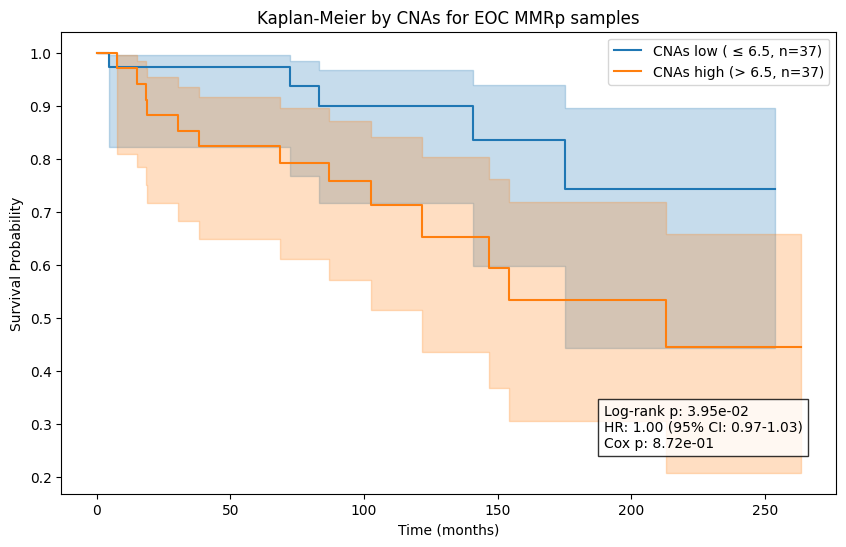

In [52]:
### SURVIVAL ANALYSIS BASED ON CNAs BY HISTOLOGY IN MMRp GROUP ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter the data for HISTOLOGY = 0 and MMRp status.Change to 'HISTOLOGY'=1 for CCOC
df_filtered = df_variables[(df_variables['HISTOLOGY'] == 0) & (df_variables['MMR_final_status'] == 'MMRp')].copy()

# Convert OS_MONTHS, VITAL STATUS, and CNV to numeric after making an explicit copy of the DataFrame
df_clean = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'CNV']).copy()
df_clean['OS_MONTHS'] = pd.to_numeric(df_clean['OS_MONTHS'], errors='coerce')
df_clean['VITAL STATUS'] = pd.to_numeric(df_clean['VITAL STATUS'], errors='coerce')
df_clean['CNV'] = pd.to_numeric(df_clean['CNV'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_clean = df_clean.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'CNV']).copy()

# Perform Cox proportional hazards model with CNV
cox_data = df_clean[['OS_MONTHS', 'VITAL STATUS', 'CNV']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['CNV']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split CNV into two groups for Kaplan-Meier: low and high based on median CNV value
median_cnv = df_clean['CNV'].median()
df_cnv_low = df_clean[df_clean['CNV'] <= median_cnv]
df_cnv_high = df_clean[df_clean['CNV'] > median_cnv]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_cnv_low['OS_MONTHS'], 
            event_observed=df_cnv_low['VITAL STATUS'], 
            label=f"CNAs low ( ≤ {median_cnv}, n={len(df_cnv_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_cnv_high['OS_MONTHS'], 
             event_observed=df_cnv_high['VITAL STATUS'], 
             label=f"CNAs high (> {median_cnv}, n={len(df_cnv_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_cnv_low['OS_MONTHS'], df_cnv_high['OS_MONTHS'],
                               event_observed_A=df_cnv_low['VITAL STATUS'],
                               event_observed_B=df_cnv_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("Kaplan-Meier by CNAs for EOC MMRp samples")
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.savefig("/home/vant/TFM/Plots_TFM_final/KM_CNV_EOC_MMRp_with_Cox.png", dpi=300)
plt.show()

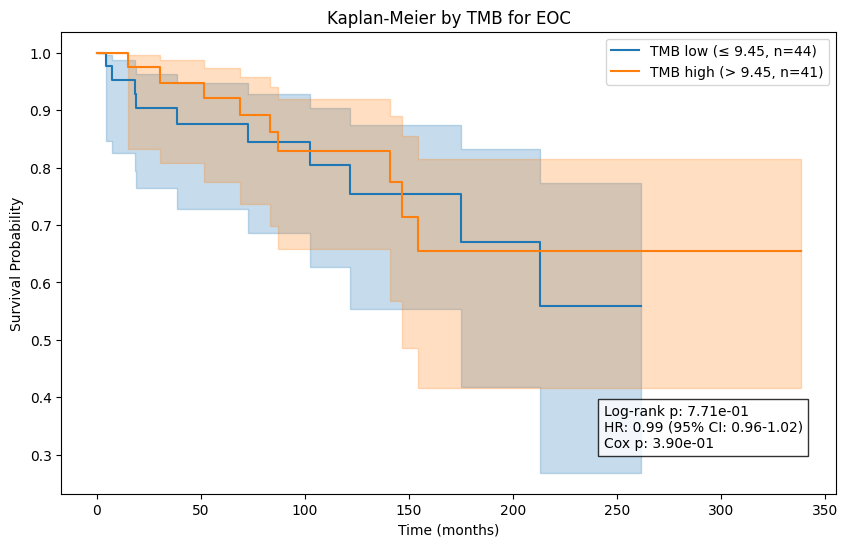

In [43]:
## SURVIVAL ANALYSIS BASED ON TMB WITH HISTOLOGY FILTER ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter data to include only samples with HISTOLOGY = 0.Change to 'HISTOLOGY'=1 for CCOC
df_filtered = df_variables[df_variables['HISTOLOGY'] == 0].copy()

# Convert OS_MONTHS, VITAL STATUS, and TMB to numeric after making an explicit copy of the DataFrame
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'TMB']).copy()
df_filtered['OS_MONTHS'] = pd.to_numeric(df_filtered['OS_MONTHS'], errors='coerce')
df_filtered['VITAL STATUS'] = pd.to_numeric(df_filtered['VITAL STATUS'], errors='coerce')
df_filtered['TMB'] = pd.to_numeric(df_filtered['TMB'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'TMB']).copy()

# Perform Cox proportional hazards model with TMB
cox_data = df_filtered[['OS_MONTHS', 'VITAL STATUS', 'TMB']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['TMB']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split TMB into two groups for Kaplan-Meier: TMB-low and TMB-high based on median TMB value
median_tmb = round(df_filtered['TMB'].median(),2)
df_tmb_low = df_filtered[df_filtered['TMB'] <= median_tmb]
df_tmb_high = df_filtered[df_filtered['TMB'] > median_tmb]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_tmb_low['OS_MONTHS'], 
            event_observed=df_tmb_low['VITAL STATUS'], 
            label=f"TMB low (≤ {median_tmb:.2f}, n={len(df_tmb_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_tmb_high['OS_MONTHS'], 
             event_observed=df_tmb_high['VITAL STATUS'], 
             label=f"TMB high (> {median_tmb:.2f}, n={len(df_tmb_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_tmb_low['OS_MONTHS'], df_tmb_high['OS_MONTHS'],
                               event_observed_A=df_tmb_low['VITAL STATUS'],
                               event_observed_B=df_tmb_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("Kaplan-Meier by TMB for EOC") # Change for CCOC when analysing CCOC samples
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

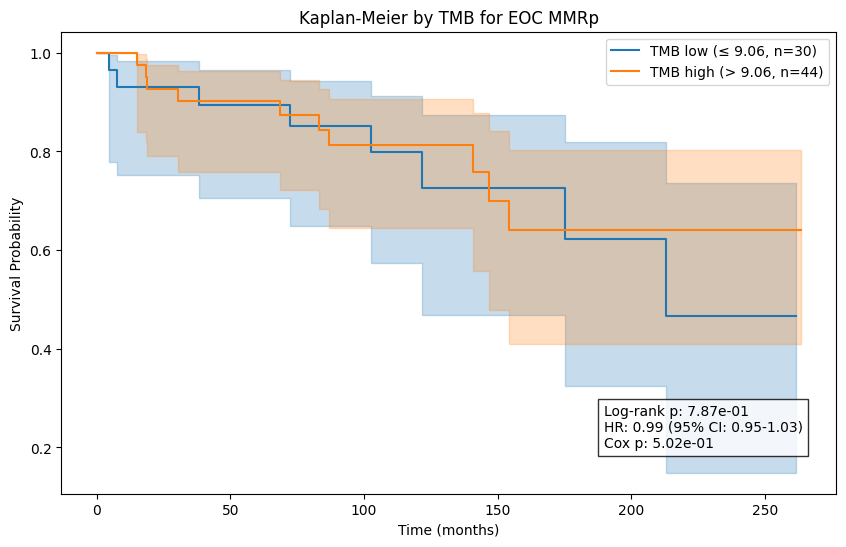

In [54]:
## SURVIVAL ANALYSIS BASED ON TMB BY HISTOLOGY IN THE MMRp SAMPLES ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter data to include only samples with HISTOLOGY = 0 and MMR_final_status = 'MMRp'. Change to 'HISTOLOGY'=1 for CCOC
df_filtered = df_variables[(df_variables['HISTOLOGY'] == 0) & (df_variables['MMR_final_status'] == 'MMRp')].copy()

# Convert OS_MONTHS, VITAL STATUS, and TMB to numeric after making an explicit copy of the DataFrame
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'TMB']).copy()
df_filtered['OS_MONTHS'] = pd.to_numeric(df_filtered['OS_MONTHS'], errors='coerce')
df_filtered['VITAL STATUS'] = pd.to_numeric(df_filtered['VITAL STATUS'], errors='coerce')
df_filtered['TMB'] = pd.to_numeric(df_filtered['TMB'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'TMB']).copy()

# Perform Cox proportional hazards model with TMB
cox_data = df_filtered[['OS_MONTHS', 'VITAL STATUS', 'TMB']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['TMB']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split TMB into two groups for Kaplan-Meier: TMB-low and TMB-high based on median TMB value
median_tmb = round(df_filtered['TMB'].median(),2)
df_tmb_low = df_filtered[df_filtered['TMB'] <= median_tmb]
df_tmb_high = df_filtered[df_filtered['TMB'] > median_tmb]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_tmb_low['OS_MONTHS'], 
            event_observed=df_tmb_low['VITAL STATUS'], 
            label=f"TMB low (≤ {median_tmb}, n={len(df_tmb_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_tmb_high['OS_MONTHS'], 
             event_observed=df_tmb_high['VITAL STATUS'], 
             label=f"TMB high (> {median_tmb}, n={len(df_tmb_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_tmb_low['OS_MONTHS'], df_tmb_high['OS_MONTHS'],
                               event_observed_A=df_tmb_low['VITAL STATUS'],
                               event_observed_B=df_tmb_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("Kaplan-Meier by TMB for EOC MMRp") # Change for CCOC when analysing CCOC samples
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

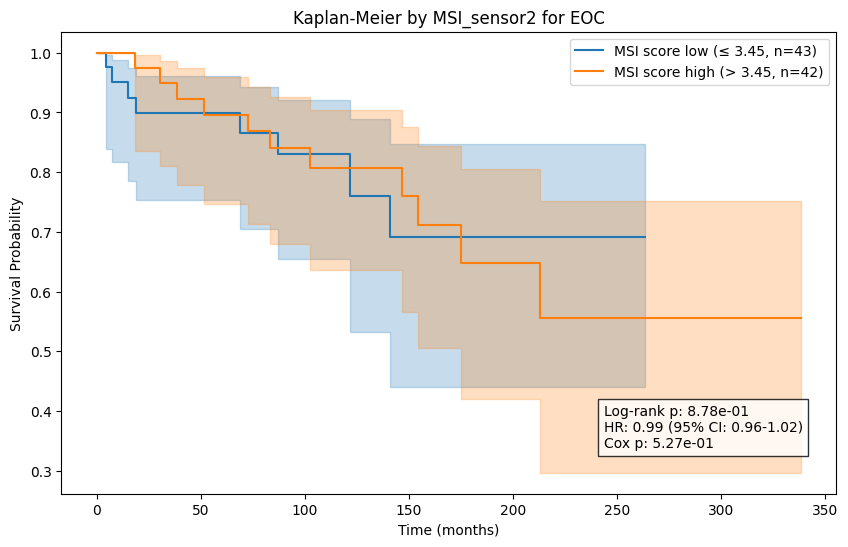

In [44]:
## SURVIVAL ANALYSIS BASED ON MSI_sensor2 WITH HISTOLOGY FILTER ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter data to include only samples with HISTOLOGY = 0. Change to 'HISTOLOGY'=1 for CCOC
df_filtered = df_variables[df_variables['HISTOLOGY'] == 0].copy()

# Convert OS_MONTHS, VITAL STATUS, and MSI_sensor2 to numeric after making an explicit copy of the DataFrame
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'MSI_sensor2']).copy()
df_filtered['OS_MONTHS'] = pd.to_numeric(df_filtered['OS_MONTHS'], errors='coerce')
df_filtered['VITAL STATUS'] = pd.to_numeric(df_filtered['VITAL STATUS'], errors='coerce')
df_filtered['MSI_sensor2'] = pd.to_numeric(df_filtered['MSI_sensor2'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'MSI_sensor2']).copy()

# Perform Cox proportional hazards model with MSI_sensor2
cox_data = df_filtered[['OS_MONTHS', 'VITAL STATUS', 'MSI_sensor2']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['MSI_sensor2']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split MSI_sensor2 into two groups for Kaplan-Meier: MSI-low and MSI-high based on median MSI_sensor2 value
median_msi = df_filtered['MSI_sensor2'].median()
df_msi_low = df_filtered[df_filtered['MSI_sensor2'] <= median_msi]
df_msi_high = df_filtered[df_filtered['MSI_sensor2'] > median_msi]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_msi_low['OS_MONTHS'], 
            event_observed=df_msi_low['VITAL STATUS'], 
            label=f"MSI score low (≤ {median_msi}, n={len(df_msi_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_msi_high['OS_MONTHS'], 
             event_observed=df_msi_high['VITAL STATUS'], 
             label=f"MSI score high (> {median_msi}, n={len(df_msi_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_msi_low['OS_MONTHS'], df_msi_high['OS_MONTHS'],
                               event_observed_A=df_msi_low['VITAL STATUS'],
                               event_observed_B=df_msi_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("Kaplan-Meier by MSI score for EOC")# Change for CCOC when analysing CCOC samples
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

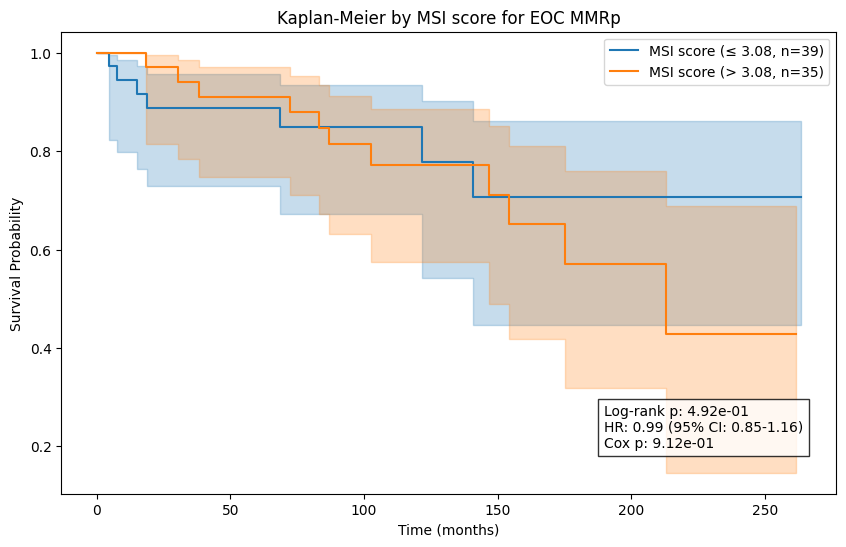

In [53]:
## SURVIVAL ANALYSIS BASED ON MSI_sensor2 BY HISTOLOGY IN MMRp SAMPLES ###############

# Uncomment to import if not previously done
#from lifelines import KaplanMeierFitter, CoxPHFitter
#from lifelines.statistics import logrank_test
#import pandas as pd
#import matplotlib.pyplot as plt

# Filter data to include only samples with HISTOLOGY = 0 and MMR_final_status = 'MMRp'.Change to 'HISTOLOGY'=1 for CCOC
df_filtered = df_variables[(df_variables['HISTOLOGY'] == 0) & (df_variables['MMR_final_status'] == 'MMRp')].copy()

# Convert OS_MONTHS, VITAL STATUS, and MSI_sensor2 to numeric after making an explicit copy of the DataFrame
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'MSI_sensor2']).copy()
df_filtered['OS_MONTHS'] = pd.to_numeric(df_filtered['OS_MONTHS'], errors='coerce')
df_filtered['VITAL STATUS'] = pd.to_numeric(df_filtered['VITAL STATUS'], errors='coerce')
df_filtered['MSI_sensor2'] = pd.to_numeric(df_filtered['MSI_sensor2'], errors='coerce')

# Drop any remaining rows with NaN values after conversion
df_filtered = df_filtered.dropna(subset=['VITAL STATUS', 'OS_MONTHS', 'MSI_sensor2']).copy()

# Perform Cox proportional hazards model with MSI_sensor2
cox_data = df_filtered[['OS_MONTHS', 'VITAL STATUS', 'MSI_sensor2']].copy()
cox_data.rename(columns={'OS_MONTHS': 'duration', 'VITAL STATUS': 'event'}, inplace=True)

cox_model = CoxPHFitter()
cox_model.fit(cox_data, duration_col='duration', event_col='event')

# Extract results from Cox model
cox_summary = cox_model.summary.loc['MSI_sensor2']
hr = cox_summary['exp(coef)']
hr_lower = cox_summary['exp(coef) lower 95%']
hr_upper = cox_summary['exp(coef) upper 95%']
cox_p_value = cox_summary['p']

# Split MSI_sensor2 into two groups for Kaplan-Meier: MSI-low and MSI-high based on median MSI_sensor2 value
median_msi = df_filtered['MSI_sensor2'].median()
df_msi_low = df_filtered[df_filtered['MSI_sensor2'] <= median_msi]
df_msi_high = df_filtered[df_filtered['MSI_sensor2'] > median_msi]

# Initialize Kaplan-Meier fitters
kmf_low = KaplanMeierFitter()
kmf_high = KaplanMeierFitter()

# Plot survival curves
plt.figure(figsize=(10, 6))

kmf_low.fit(durations=df_msi_low['OS_MONTHS'], 
            event_observed=df_msi_low['VITAL STATUS'], 
            label=f"MSI score low (≤ {median_msi}, n={len(df_msi_low)})")
ax = kmf_low.plot_survival_function(ci_show=True)

kmf_high.fit(durations=df_msi_high['OS_MONTHS'], 
             event_observed=df_msi_high['VITAL STATUS'], 
             label=f"MSI score high (> {median_msi}, n={len(df_msi_high)})")
kmf_high.plot_survival_function(ax=ax, ci_show=True)

# Perform log-rank test
logrank_results = logrank_test(df_msi_low['OS_MONTHS'], df_msi_high['OS_MONTHS'],
                               event_observed_A=df_msi_low['VITAL STATUS'],
                               event_observed_B=df_msi_high['VITAL STATUS'])

logrank_p_value = logrank_results.p_value

# Annotate the plot with log-rank p-value, HR, and CI from Cox model
plt.text(0.7, 0.1, f"Log-rank p: {logrank_p_value:.2e}\n"
                   f"HR: {hr:.2f} (95% CI: {hr_lower:.2f}-{hr_upper:.2f})\n"
                   f"Cox p: {cox_p_value:.2e}",
         transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# Finalize plot
plt.title("Kaplan-Meier by MSI score for EOC MMRp")# Change for CCOC when analysing CCOC samples
plt.xlabel("Time (months)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()